# Анализ расходуемого трафика 

### Импорт данных

In [51]:
#импорт библиотек 
import pandas as pd
from datetime import datetime, timedelta
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [52]:
#создание датафрейма
files = glob.glob('*.xls')

traffic = pd.DataFrame()

for file in files:
    data = pd.read_excel(file)
    data['date'] = file
    traffic = pd.concat([traffic, data])

In [53]:
#вывод датафрейма traffic 
traffic

,Юридическое лицо,Контракт,ЛС,Номер,ФИО,Комментарий,GPRS МБ.,SMS шт.,MMS шт.,МТС мин.,М. моб. мин.,М. фикс. мин.,МГ мин.,МН мин.,ВСР мин.,МНР мин.,date
0,Санкт-Петербургское государственное унитарное ...,178360508296,278362290085,79111535872,NaN,NaN,7369.54,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0,Отчёт о трафике 01.01.2021 - 31.01.2021.xls
1,Санкт-Петербургское государственное унитарное ...,178360508296,278362290085,79111536560,NaN,NaN,2503.95,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0,Отчёт о трафике 01.01.2021 - 31.01.2021.xls
2,Санкт-Петербургское государственное унитарное ...,178360508296,278362290085,79111536656,NaN,NaN,2226.57,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0,Отчёт о трафике 01.01.2021 - 31.01.2021.xls
3,Санкт-Петербургское государственное унитарное ...,178360508296,278362290085,79111536973,NaN,NaN,33.36,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0,Отчёт о трафике 01.01.2021 - 31.01.2021.xls
4,Санкт-Петербургское государственное унитарное ...,178360508296,278362290085,79111537160,NaN,NaN,2509.02,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0,Отчёт о трафике 01.01.2021 - 31.01.2021.xls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8591,Санкт-Петербургское государственное унитарное ...,178360508296,278362289902,79119795091,NaN,NaN,19.86,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0,Отчёт о трафике 01.12.2022 - 31.12.2022.xls
8592,Санкт-Петербургское государственное унитарное ...,178360508296,278362289902,79119839159,NaN,NaN,27.34,0,0,0.0,0.0,1.08,0.0,0.0,0.0,0,Отчёт о трафике 01.12.2022 - 31.12.2022.xls
8593,Санкт-Петербургское государственное унитарное ...,178360508296,278362289902,79119840804,NaN,NaN,0.00,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0,Отчёт о трафике 01.12.2022 - 31.12.2022.xls
8594,Санкт-Петербургское государственное унитарное ...,178360508296,278362289902,79119841110,NaN,NaN,24.28,0,0,0.0,0.0,2.60,0.0,0.0,0.0,0,Отчёт о трафике 01.12.2022 - 31.12.2022.xls


### Предобработка данных

In [54]:
#удаление столбцов

traffic.drop(traffic.columns[[0, 1, 4, 5]], axis = 1, inplace = True)

In [55]:
#приведения названия столбцов к нижему регистру 

traffic.columns = traffic.columns.str.lower()

In [56]:
#проверка
traffic.head()

,лс,номер,gprs мб.,sms шт.,mms шт.,мтс мин.,м. моб. мин.,м. фикс. мин.,мг мин.,мн мин.,вср мин.,мнр мин.,date
0,278362290085,79111535872,7369.54,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,Отчёт о трафике 01.01.2021 - 31.01.2021.xls
1,278362290085,79111536560,2503.95,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,Отчёт о трафике 01.01.2021 - 31.01.2021.xls
2,278362290085,79111536656,2226.57,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,Отчёт о трафике 01.01.2021 - 31.01.2021.xls
3,278362290085,79111536973,33.36,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,Отчёт о трафике 01.01.2021 - 31.01.2021.xls
4,278362290085,79111537160,2509.02,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,Отчёт о трафике 01.01.2021 - 31.01.2021.xls


In [57]:
traffic.drop(traffic.columns[[3, 4, 5, 6, 7, 8, 9, 10, 11]], axis = 1, inplace = True)

In [58]:
#переименование столбцов 

traffic.rename(columns = {'лс':'account', 'номер': 'mobile_number', 'gprs мб.': 'gprs_mb'}, inplace = True)

In [59]:
#traffic['gprs_gb'] = traffic['gprs_gb'] * 0.001 

In [60]:
traffic['date'] = traffic['date'].str.extract(r"\b(\d{2}\.\d{2}\.\d{4})\b")[0]
traffic['date'] = pd.to_datetime(traffic['date'], format='%d.%m.%Y') 

In [61]:
traffic['month'] = pd.DatetimeIndex(traffic['date']).month
traffic['year'] = pd.DatetimeIndex(traffic['date']).year

In [62]:
def categorize_traffic_limit(account):
    try:
        if account == 278362289902:
            return 300
        elif account == 278362290085:
            return 25000
        elif account == 278363275520:
            return 25000
    except:
        pass

traffic['traffic_limit_mb'] = traffic['account'].apply(categorize_traffic_limit)

In [63]:
#вывод получшившегося датафрейма traffic
traffic

,account,mobile_number,gprs_mb,date,month,year,traffic_limit_mb
0,278362290085,79111535872,7369.54,2021-01-01,1,2021,25000
1,278362290085,79111536560,2503.95,2021-01-01,1,2021,25000
2,278362290085,79111536656,2226.57,2021-01-01,1,2021,25000
3,278362290085,79111536973,33.36,2021-01-01,1,2021,25000
4,278362290085,79111537160,2509.02,2021-01-01,1,2021,25000
...,...,...,...,...,...,...,...
8591,278362289902,79119795091,19.86,2022-12-01,12,2022,300
8592,278362289902,79119839159,27.34,2022-12-01,12,2022,300
8593,278362289902,79119840804,0.00,2022-12-01,12,2022,300
8594,278362289902,79119841110,24.28,2022-12-01,12,2022,300


In [64]:
#вывод информации о получившемся датафрейме 

traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300860 entries, 0 to 8595
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   account           300860 non-null  int64         
 1   mobile_number     300860 non-null  int64         
 2   gprs_mb           300860 non-null  float64       
 3   date              300860 non-null  datetime64[ns]
 4   month             300860 non-null  int64         
 5   year              300860 non-null  int64         
 6   traffic_limit_mb  300860 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 18.4 MB


In [65]:
#вывод количества пропущенных значений для каждого столбца датафрейма traffic

traffic.isnull().sum()

account             0
mobile_number       0
gprs_mb             0
date                0
month               0
year                0
traffic_limit_mb    0
dtype: int64

In [66]:
#проверка датафрейма traffic на наличие явных дубликатов 

traffic.duplicated().sum()

0

## Анализ данных 

In [125]:
#вывод количества уникальных номеров SIM-карт по каждому лицевому счету 
sim = traffic.groupby('account').agg({'mobile_number': 'nunique'}).sort_values(by = 'mobile_number', ascending = False)

sim

,mobile_number
account,
278362289902,4720
278362290085,3059
278363275520,817


In [126]:
#создание сводной таблицы по каждому лицевому счету, количеству сим (неуникальных) и количеству израсходного трафика 

new_traffic = traffic.groupby('account').agg({'mobile_number': 'count', 'gprs_mb': 'sum'}).sort_values(by = 'mobile_number', ascending = False)
new_traffic['gprs_mb_1_sim'] = new_traffic['gprs_mb'] / new_traffic['mobile_number'] 
new_traffic

,mobile_number,gprs_mb,gprs_mb_1_sim
account,,,
278362289902,165200,1.650897e+07,99.933238
278362290085,107065,3.009480e+08,2810.890652
278363275520,28595,3.519537e+07,1230.822470


In [127]:
new_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 278362289902 to 278363275520
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mobile_number  3 non-null      int64  
 1   gprs_mb        3 non-null      float64
 2   gprs_mb_1_sim  3 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 96.0 bytes


In [129]:
# создание списка лимитов на 1 SIM-карту

traffic_limit = [300, 25000, 25000]

In [130]:
# создание сводной таблицы с лимитами и расходом трафика на 1 SIM

new_traffic['traffic_limit_1_sim_mb'] = traffic_limit
new_traffic['traffic_limit_mb'] = new_traffic['mobile_number'] * new_traffic['traffic_limit_1_sim_mb']

new_traffic

,mobile_number,gprs_mb,gprs_mb_1_sim,traffic_limit_1_sim_mb,traffic_limit_mb
account,,,,,
278362289902,165200,1.650897e+07,99.933238,300,49560000
278362290085,107065,3.009480e+08,2810.890652,25000,2676625000
278363275520,28595,3.519537e+07,1230.822470,25000,714875000


In [131]:
#общее количество израсходованного трафика 

new_traffic['gprs_mb'].sum()

352652347.22

In [113]:
#лимит по SIM-картам за весь период

new_traffic['traffic_limit_mb'].sum()

3441060000

Text(0.5, 1.0, 'Количество расходуемого трафика')

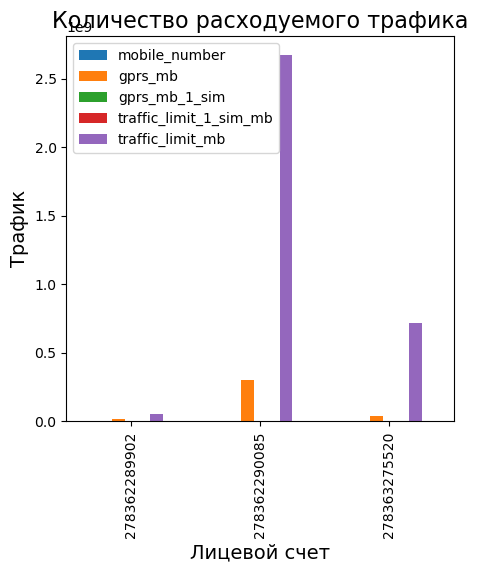

In [134]:
#построение графика 

new_traffic.plot(kind='bar', figsize = (5,5))
plt.ylabel('Трафик', fontsize= 14)
plt.xlabel('Лицевой счет', fontsize= 14)
plt.title('Количество расходуемого трафика', fontsize= 16 )

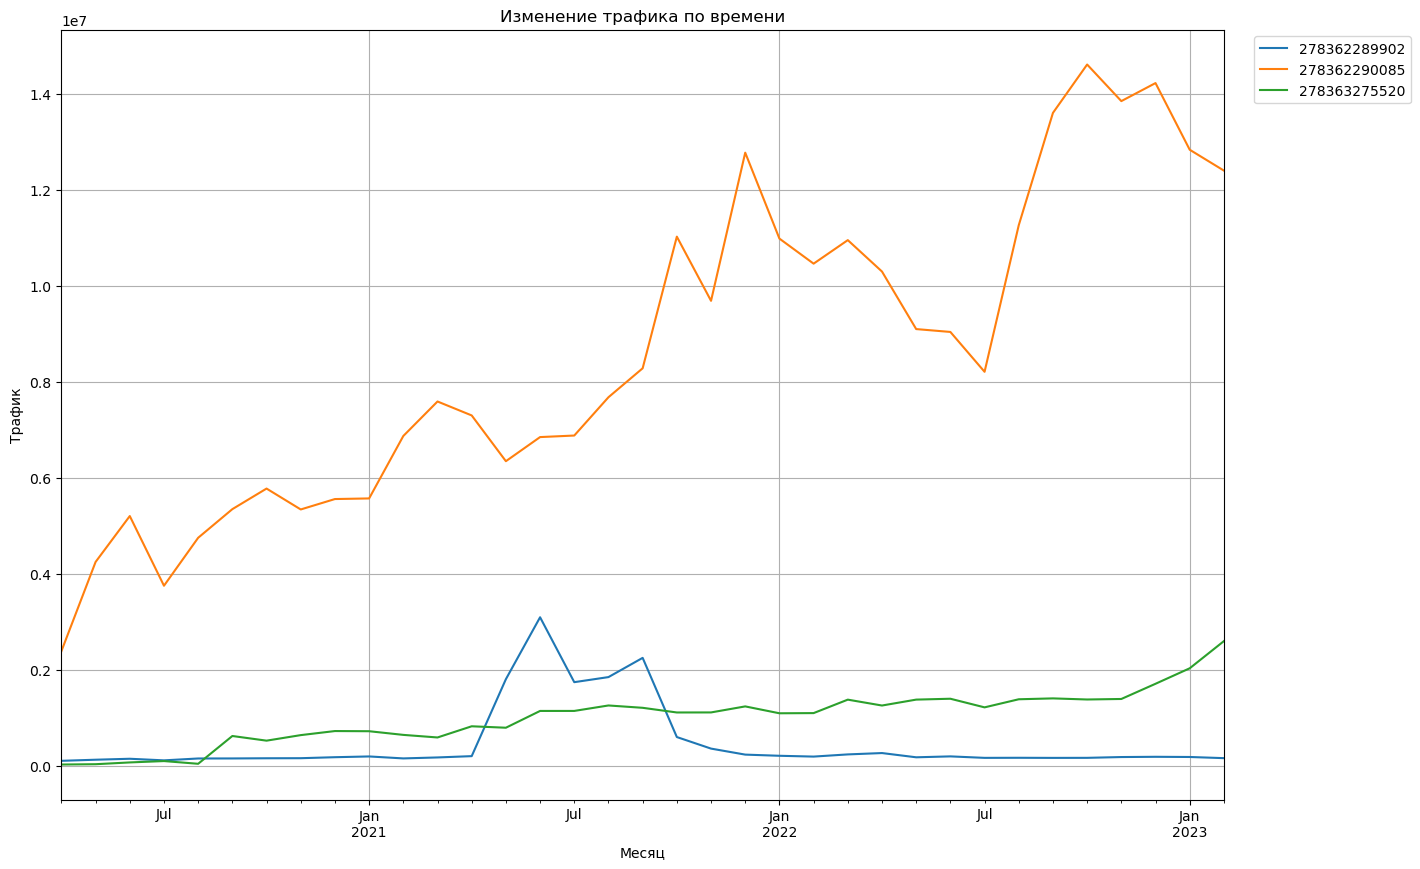

In [117]:
#построение графика динамики изменения расходов трафика во времени

traffic.pivot_table(
    index='date',  
    columns='account', 
    values='gprs_mb',  
    aggfunc='sum',  
).plot(figsize=(15, 10), grid=True)

plt.title('Изменение трафика по времени')
plt.xlabel('Месяц')
plt.ylabel('Трафик')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

In [135]:
#сводная таблица в разрезе периода времени 

stats_traffic = traffic.pivot_table(
            index=['month','year', 'account'],\
            values=['gprs_mb'],\
            aggfunc=['sum']\
).round(2).reset_index()

stats_traffic.columns=['month', 'year', 'account', 'gprs_mb_sum']

stats_traffic

,month,year,account,gprs_mb_sum
0,1,2021,278362289902,192308.99
1,1,2021,278362290085,5567743.38
2,1,2021,278363275520,717958.79
3,1,2022,278362289902,206278.82
4,1,2022,278362290085,10981254.22
...,...,...,...,...
100,12,2021,278362290085,12771076.54
101,12,2021,278363275520,1235023.35
102,12,2022,278362289902,185074.47
103,12,2022,278362290085,14221275.37


In [119]:
# минимальное значение трафика 

stats_traffic[stats_traffic['gprs_mb_sum'] == stats_traffic['gprs_mb_sum'].min()]

,month,year,account,gprs_mb_sum
26,4,2020,278363275520,24132.89


In [120]:
# максимальные значение трафика 

stats_traffic[stats_traffic['gprs_mb_sum'] == stats_traffic['gprs_mb_sum'].max()]

,month,year,account,gprs_mb_sum
85,10,2022,278362290085,14607724.86


In [136]:
# среднее значение трафика 

traffic.groupby('account').agg({'gprs_mb': 'mean'})

,gprs_mb
account,
278362289902,99.933238
278362290085,2810.890652
278363275520,1230.822470


Text(0, 0.5, 'Общее количество израсходованого трафика')

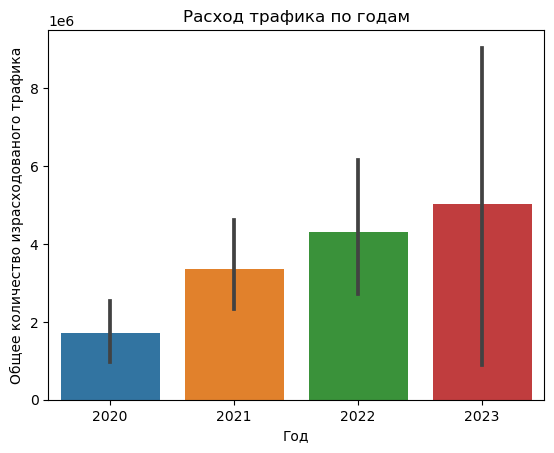

In [104]:
#построение графика расхода трафика по годам

sns.barplot(data=stats_traffic, x="year", y="gprs_mb_sum")
plt.title('Расход трафика по годам')
plt.xlabel('Год')
plt.ylabel('Общее количество израсходованого трафика')

Text(0, 0.5, 'Общее количество израсходованого трафика')

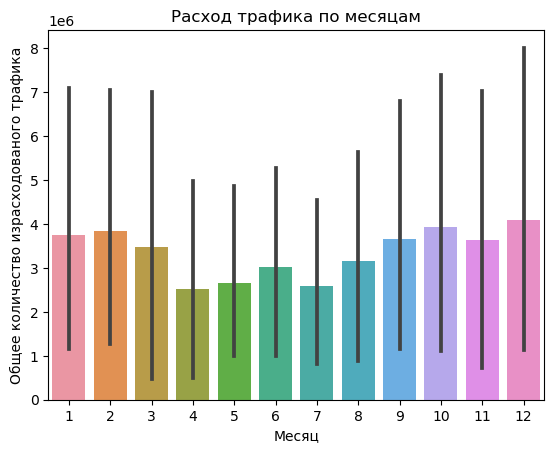

In [105]:
#построение графика расхода трафика по месяцам

sns.barplot(data=stats_traffic, x="month", y="gprs_mb_sum")
plt.title('Расход трафика по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Общее количество израсходованого трафика')

# Вывод

1. Всего уникальных выданных номеров, ед.:
- 2783622899026: 4720
- 278362290085: 3059
- 278363275520: 817
2. Суммарный потребляемый трафик в период с 2020 по 2023 года по SIM составил 352652347.22 Мб, лимит по SIM составил 3441060000 Мб.
3. Минимальный трафик зафиксирован 04.2020	по лицевому счету 278363275520	и составил 24132.89 Мб, максимальный трафик зафиксирован 10.2022 по лицевому счету 278362290085	и составил 14607724.86 Мб. 
3. С каждым годом количество расходуемого трафика возрастает.
4. Количество расходуемого трафика не зависит от месяца года. 